In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics  
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set() 
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [4]:
data = pd.read_excel('/content/Concrete_Data.xls')
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1342: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=layout_pad)


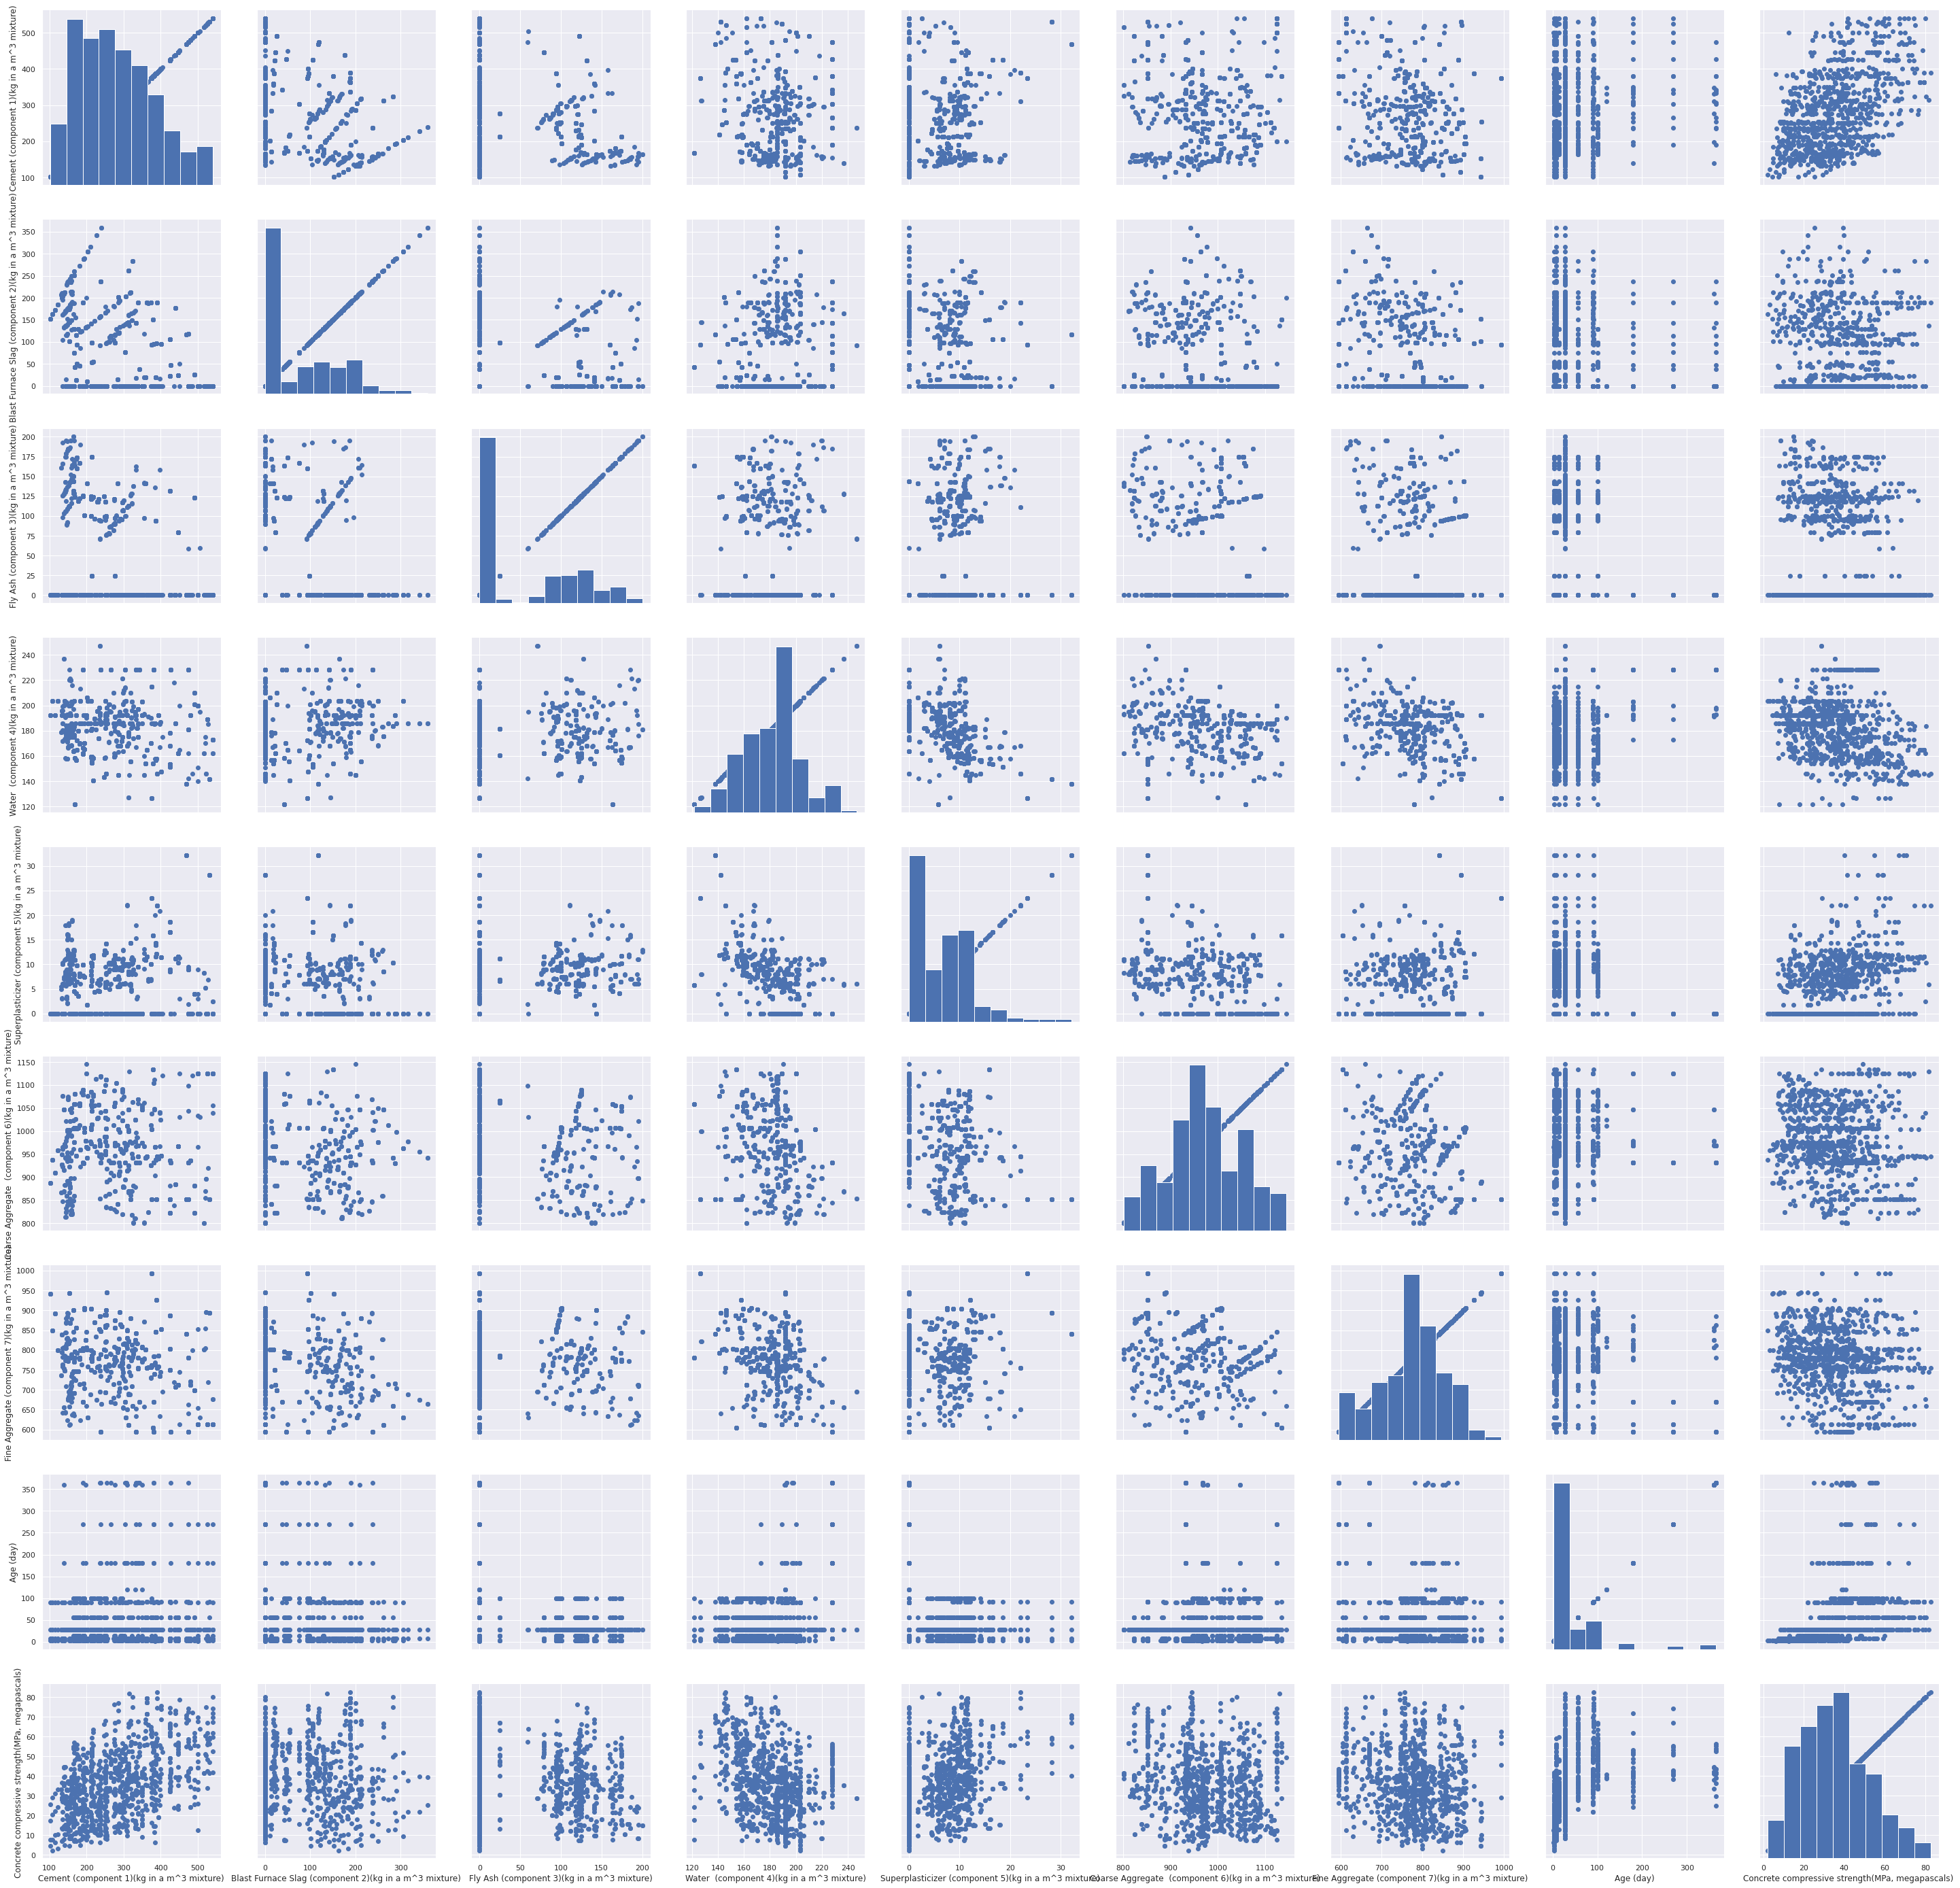

In [5]:
g = sns.pairplot(data)
g = g.map(plt.scatter)
g.fig.set_size_inches(50,50)

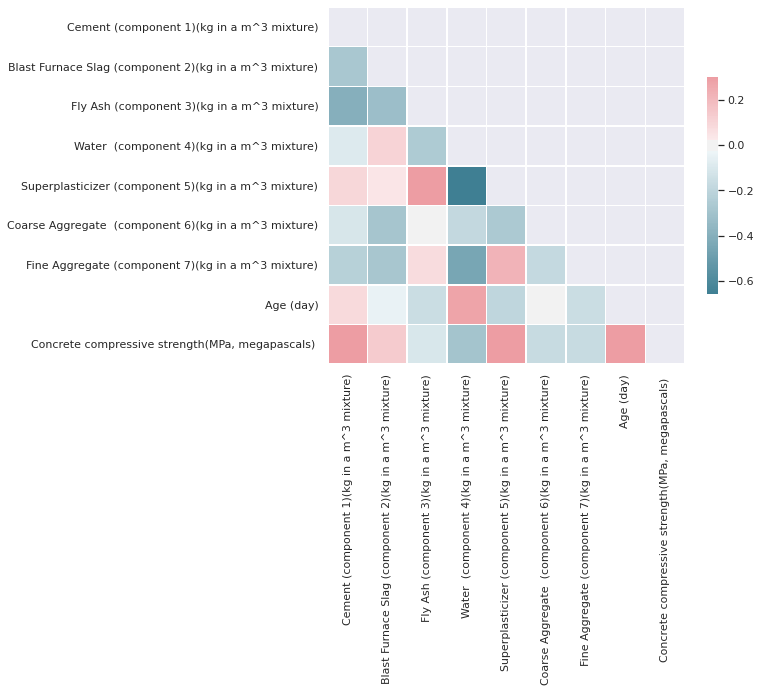

In [6]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
data = data.iloc[:,:].values
data = data[:,:]
data.shape

(1030, 9)

In [8]:
x=data[:,[0,1,3,4,8]]
y=data[:,8]
print(data.shape)
print(x)
print(y)

(1030, 9)
[[540.           0.         162.           2.5         79.98611076]
 [540.           0.         162.           2.5         61.88736576]
 [332.5        142.5        228.           0.          40.26953526]
 ...
 [148.5        139.4        192.7          6.1         23.69660064]
 [159.1        186.7        175.6         11.3         32.76803638]
 [260.9        100.5        200.6          8.6         32.40123514]]
[79.98611076 61.88736576 40.26953526 ... 23.69660064 32.76803638
 32.40123514]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y,shuffle=True, test_size=0.2)

In [10]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_pred = regressor.predict(X_test)

In [12]:
y_pred

array([39.48629052, 13.46132942,  7.50701469,  8.06342182, 11.46598588,
       24.44881896, 44.6090972 , 18.12632404, 19.98790924, 24.00065956,
       19.41564416, 25.46096973, 15.56836808, 40.06200298, 72.09850532,
       32.6266938 ,  4.90355331, 57.02655996, 13.62404576, 37.79707432,
       19.69143456, 46.24315532, 38.70028788, 74.19451236, 26.23318285,
       59.89478012, 37.43785732, 14.58931216, 27.234302  , 25.68987576,
       30.9574724 , 37.42475728, 35.34253976, 50.93848688, 51.021224  ,
       32.10988228,  8.48744956, 47.78206575, 45.2985732 , 32.72253096,
       41.05277999, 44.38846488, 30.88163004, 24.29092896, 48.71837416,
       74.69782984, 28.99936056, 54.27555072, 33.70158688, 26.74477404,
       49.99390476, 79.40005616,  7.39807748, 26.91369566, 46.2293658 ,
       37.99702236, 41.2996124 , 58.60546   , 37.81362174, 38.50033984,
       34.20490436, 36.58842289, 36.96970312, 79.29663476, 61.06688932,
       37.34202016, 42.13112046, 52.5035974 , 39.70002808, 44.61

In [13]:
df = pd.DataFrame({'Actual': y_test.flatten(),'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,39.486291,39.486291
1,13.461329,13.461329
2,7.507015,7.507015
3,8.063422,8.063422
4,11.465986,11.465986
...,...,...
201,54.598915,54.598915
202,35.301171,35.301171
203,40.148187,40.148187
204,33.060374,33.060374


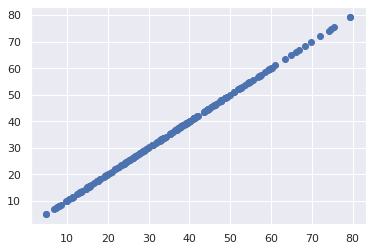

In [14]:
plt.scatter(y_pred, y_test)

In [15]:
metrics.r2_score(y_test, y_pred)

1.0

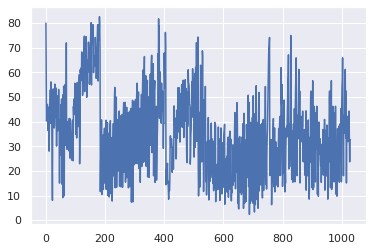

In [16]:
plt.plot(data[:,8])

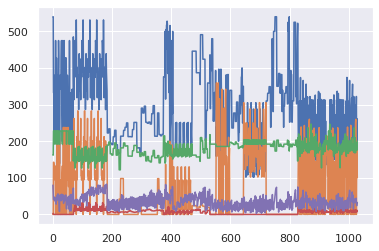

In [17]:
plt.plot(data[:,[0,1,3,4,8]])

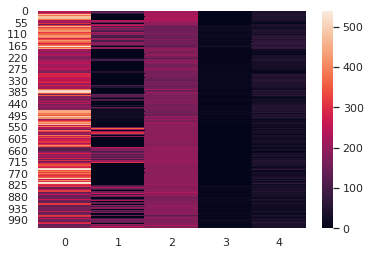

In [18]:
ax = sns.heatmap(x)